# Project analysis

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import git

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

sys.path.append(os.path.realpath(os.path.join(os.getcwd(), os.pardir, os.pardir)))
print(os.path.realpath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

from gitlytic import settings
from gitlytic.dataprocessor import load_repo_commits, load_project_commits
from gitlytic.project import get_project_output_dir_by_name, get_project_path

/home/skupsala/code/gitlytic


Set your project and repo config here

In [2]:
PROJECT_NAME = 'datascience'
pd.DataFrame.from_csv

<bound method DataFrame.from_csv of <class 'pandas.core.frame.DataFrame'>>

Load repo TSV file

In [3]:
df = load_project_commits(get_project_path(PROJECT_NAME))

Loading commits dataframe for scikit-learn
/home/skupsala/code/gitlytic/gl/lib/python3.5/site-packages/pandas/core/frame.py:1251: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  infer_datetime_format=infer_datetime_format)
Loading commits dataframe for scipy
Loading commits dataframe for matplotlib
Loading commits dataframe for seaborn
Loading commits dataframe for notebook
Loading commits dataframe for pandas
Loading commits dataframe for numpy


In [4]:
df.set_index(['repo_name', 'author_email', 'commit_hash'], drop=False, inplace=True)
df.head()

commit_hash  \
repo_name    author_email                         commit_hash                                                                          
scikit-learn rajendraarora16@yahoo.com            78ccdd1d6f38da0b2cc0b673801f2ab18cb7aad3  78ccdd1d6f38da0b2cc0b673801f2ab18cb7aad3   
             francesco.siani.cs@gmail.com         dd95c13f51cf15de18d714f54a8bb798a2d5cb41  dd95c13f51cf15de18d714f54a8bb798a2d5cb41   
             rajendraarora16@yahoo.com            bcefc85d1ac4ea375ec076fc47b12a480e0e3d42  bcefc85d1ac4ea375ec076fc47b12a480e0e3d42   
             loic.esteve@ymail.com                ab984a68b4bdc1b1a8438c74db3e2b05d52b73bd  ab984a68b4bdc1b1a8438c74db3e2b05d52b73bd   
             maskani-moh@users.noreply.github.com 7182a43a6fdc19d469b76f43baf413de5b3f0b10  7182a43a6fdc19d469b76f43baf413de5b3f0b10   

                                                                                                author_name  \
repo_name    author_email                         commit_hash                                                 
scikit-learn rajendraarora16@yahoo.com            78ccdd1d6f38da0b2cc0b673801f2ab18cb7aad3   Rajendra arora   
             francesco.siani.cs@gmail.com         dd95c13f51cf15de18d714f54a8bb798a2d5cb41             frsi   
             rajendraarora16@yahoo.com            bcefc85d1ac4ea375ec076fc47b12a480e0e3d42   Rajendra arora   
             loic.esteve@ymail.com                ab984a68b4bdc1b1a8438c74db3e2b05d52b73bd      Loïc Estève   
             maskani-moh@users.noreply.github.com 7182a43a6fdc19d469b76f43baf413de5b3f0b10  Mohamed Maskani   

                                                                                                                    author_email  \
repo_name    author_email                         commit_hash                                                                      
scikit-learn rajendraarora16@yahoo.com            78ccdd1d6f38da0b2cc0b673801f2ab18cb7aad3             rajendraarora16@yahoo.com   
             francesco.siani.cs@gmail.com         dd95c13f51cf15de18d714f54a8bb798a2d5cb41          francesco.siani.cs@gmail.com   
             rajendraarora16@yahoo.com            bcefc85d1ac4ea375ec076fc47b12a480e0e3d42             rajendraarora16@yahoo.com   
             loic.esteve@ymail.com                ab984a68b4bdc1b1a8438c74db3e2b05d52b73bd                 loic.esteve@ymail.com   
             maskani-moh@users.noreply.github.com 7182a43a6fdc19d469b76f43baf413de5b3f0b10  maskani-moh@users.noreply.github.com   

                                                                                                   author_date  \
repo_name    author_email                         commit_hash                                                    
scikit-learn rajendraarora16@yahoo.com            78ccdd1d6f38da0b2cc0b673801f2ab18cb7aad3 2017-12-05 21:25:00   
             francesco.siani.cs@gmail.com         dd95c13f51cf15de18d714f54a8bb798a2d5cb41 2017-12-05 14:20:42   
             rajendraarora16@yahoo.com            bcefc85d1ac4ea375ec076fc47b12a480e0e3d42 2017-12-05 17:36:55   
             loic.esteve@ymail.com                ab984a68b4bdc1b1a8438c74db3e2b05d52b73bd 2017-12-04 20:37:59   
             maskani-moh@users.noreply.github.com 7182a43a6fdc19d469b76f43baf413de5b3f0b10 2017-12-04 09:20:21   

                                                                                                committer_name  \
repo_name    author_email                         commit_hash                                                    
scikit-learn rajendraarora16@yahoo.com            78ccdd1d6f38da0b2cc0b673801f2ab18cb7aad3          Hanmin Qin   
             francesco.siani.cs@gmail.com         dd95c13f51cf15de18d714f54a8bb798a2d5cb41        Joel Nothman   
             rajendraarora16@yahoo.com            bcefc85d1ac4ea375ec076fc47b12a480e0e3d42          Hanmin Qin   
             loic.esteve@ymail.com                ab984a68b4bdc1b1a8438c74db3e2b05d52b73bd      

## Project overview
TODO
- TOP 10 contributors (3months, 2weeks)
  * How many commits
  * Percentage of commits
- Commmits per week chart over X weeks
- Commit message length distribution over all commits
- LOC over time
- Author count over time
- New authors per week for last X weeks
- Files over time
- Directories over time
- Fix commits over time

#### Commit and author count

In [5]:
total_commit_count = len(df)
print("Commit count: {}".format(total_commit_count))
total_author_count = df['author_email'].nunique()
print("Author count: {}".format(total_author_count))

Commit count: 110377
Author count: 4317


In [6]:
def get_top_contributors(df, top_count=10):
    commit_count = len(df)
    top_committers = df.groupby('author_email').size().sort_values(ascending=False)[:top_count].to_frame(name='commit_count')
    top_committers['percentage_of_commits'] = (top_committers['commit_count'] / commit_count) * 100.0
    return top_committers

In [7]:
repos_by_hour = {}
for repo_name, repo_df in df.groupby(level=0):
    print()
    print('-----------------------------------------------------------')
    print('Repo: {}'.format(repo_name))
    print('Commits: {}'.format(len(repo_df)))
    print('Authors: {}'.format(repo_df['author_email'].nunique()))
    oldest_commit = repo_df.iloc[-1]
    age_delta = datetime.now() - oldest_commit.author_date.to_pydatetime()
    age_delta_years = age_delta.days // 366 # This is not exact - precise enough for this purpose
    print('Age: {years} year(s) and {days} day(s)'.format(years=age_delta_years, days=(age_delta.days-age_delta_years*365)))
    print('First commit was written {} by {}'.format(oldest_commit.author_date.to_pydatetime(), oldest_commit.author_name))
    print('For nostalgy, here it is:')
    print(oldest_commit.subject)
    print()
    print('Since that a lot have happened...')
    TOP_COUNT = 5
    print('Here you see top {} contributors portion of the contributions'.format(TOP_COUNT))
    repo_top_contributors = get_top_contributors(repo_df, top_count=TOP_COUNT)
    print(repo_top_contributors.sum())
    print(repo_top_contributors)
    print()
    print('Last three months top {} contributors'.format(TOP_COUNT))
    last_three_months_commits = repo_df[repo_df['author_date'] >= (datetime.today() - timedelta(days=3 * 30))]
    last_three_months_top_contributors = get_top_contributors(last_three_months_commits, top_count=TOP_COUNT)
    print(last_three_months_top_contributors)
    print()
    print('Last two weeks top {} contributors'.format(TOP_COUNT))
    last_two_weeks_commits = repo_df[repo_df['author_date'] >= (datetime.today() - timedelta(days=14))]
    last_two_weeks_top_contributors = get_top_contributors(last_two_weeks_commits, top_count=TOP_COUNT)
    print(last_two_weeks_top_contributors)
    author_date_index = pd.DatetimeIndex(repo_df['author_date'])
    repos_by_hour[repo_name] = repo_df.groupby(author_date_index.hour)['author_email'].count()
    


-----------------------------------------------------------
Repo: matplotlib
Commits: 23714
Authors: 819
Age: 14 year(s) and 236 day(s)
First commit was written 2003-05-12 15:20:38 by John Hunter
For nostalgy, here it is:
The new matplotlib hierarchy

Since that a lot have happened...
Here you see top 5 contributors portion of the contributions
commit_count             11906.000000
percentage_of_commits       50.206629
dtype: float64
                           commit_count  percentage_of_commits
author_email                                                  
mdboom@gmail.com                   3876              16.344775
tcaswell@gmail.com                 3509              14.797166
jdh2358@gmail.com                  2145               9.045290
efiring@hawaii.edu                 1689               7.122375
nelle.varoquaux@gmail.com           687               2.897023

Last three months top 5 contributors
                           commit_count  percentage_of_commits
author_email       

/home/skupsala/code/gitlytic/gl/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: 'author_email' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


### Commits over time

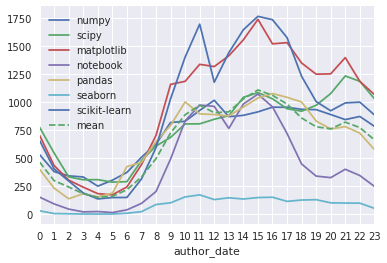

In [8]:
for repo_name, by_hour in repos_by_hour.items():
    ax = by_hour.plot(xticks=np.arange(24), label=repo_name)
    ax.legend()
mean_by_hour_df = pd.concat(list(repos_by_hour.values()), axis=1)
ax = mean_by_hour_df.mean(axis=1).plot(xticks=np.arange(24), label='mean', style='--')
ax.legend()

### Subject line distributions

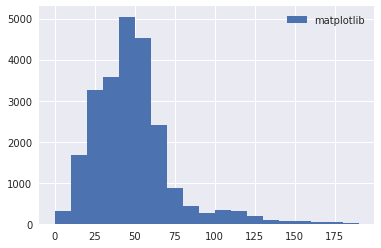

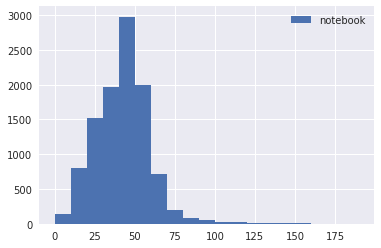

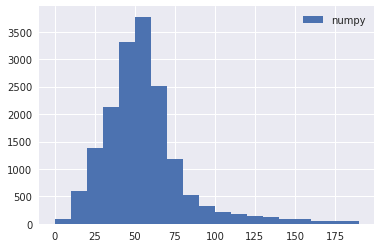

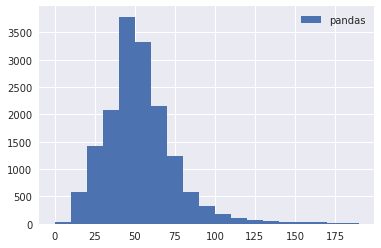

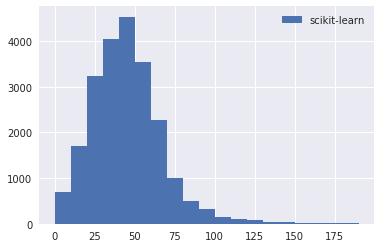

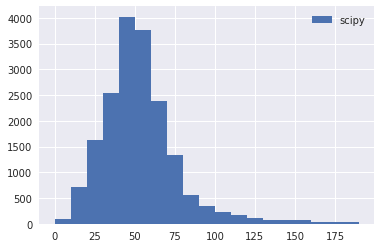

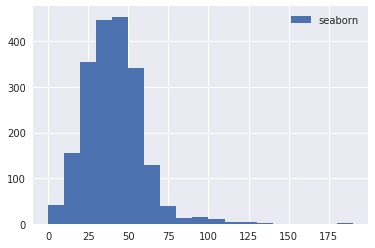

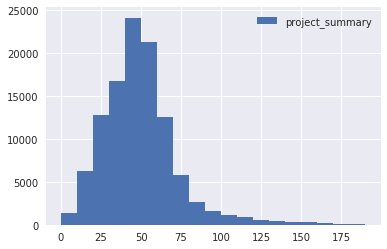

In [9]:
for repo_name, repo_df in df.groupby(level=0):
    plt.figure()
    s = pd.Series(repo_df['subject'].str.len().values)
    ax = s.dropna().hist(bins=[n for n in range(0, 200, 10)], label=repo_name)
    ax.legend()

plt.figure()
s = pd.Series(df['subject'].str.len().values)
ax = s.dropna().hist(bins=[n for n in range(0, 200, 10)], label='project_summary')
ax.legend()

In [ ]:
single